### 1. PCA
#### 와인데이터의 전체 변수를 사용한 logistic regression 모델과 PCA로 차원을 축소한모델의 성능을 비교
- the coef_ did not converge 메세지가 나오는 경우, 모델 만들때 max_iter=10000 추가 
    - ex) LogisticRegression(solver="sag",max_iter=10000, multi_class="multinomial")

In [1]:
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
from sklearn.datasets import load_wine

wine=load_wine()

In [5]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [7]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [16]:
x=wine.data
y=wine.target

In [17]:
feature_name=[wine.feature_names]
x_data=pd.DataFrame(x,columns=feature_name)
x_data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [18]:
y_data=pd.DataFrame(y,columns=['target'])
y_data.head()

,target
0,0
1,0
2,0
3,0
4,0


In [19]:
pca=PCA(n_components=2)
pca.fit(x_data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [20]:
pca.explained_variance_

array([99201.78951748,   172.53526648])

In [21]:
PCscore=pca.transform(x_data)
PCscore[0:5]

array([[ 3.18562979e+02,  2.14921307e+01],
       [ 3.03097420e+02, -5.36471768e+00],
       [ 4.38061133e+02, -6.53730945e+00],
       [ 7.33240139e+02,  1.92729032e-01],
       [-1.15714285e+01,  1.84899946e+01]])

In [22]:
x_data[0:5]

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [23]:
elgens_v=pca.components_.transpose()
print(elgens_v)

[[ 1.65926472e-03  1.20340617e-03]
 [-6.81015556e-04  2.15498184e-03]
 [ 1.94905742e-04  4.59369254e-03]
 [-4.67130058e-03  2.64503930e-02]
 [ 1.78680075e-02  9.99344186e-01]
 [ 9.89829680e-04  8.77962152e-04]
 [ 1.56728830e-03 -5.18507284e-05]
 [-1.23086662e-04 -1.35447892e-03]
 [ 6.00607792e-04  5.00440040e-03]
 [ 2.32714319e-03  1.51003530e-02]
 [ 1.71380037e-04 -7.62673115e-04]
 [ 7.04931645e-04 -3.49536431e-03]
 [ 9.99822937e-01 -1.77738095e-02]]


In [24]:
mX=np.matrix(x)
for i in range(x.shape[1]):
    mX[:,i]=mX[i,1]-np.mean(x[:,i])
mX_df=pd.DataFrame(mX)

In [25]:
(mX*elgens_v)[0:5]

matrix([[-749.05825383,  -87.59011855],
        [-749.05825383,  -87.59011855],
        [-749.05825383,  -87.59011855],
        [-749.05825383,  -87.59011855],
        [-749.05825383,  -87.59011855]])

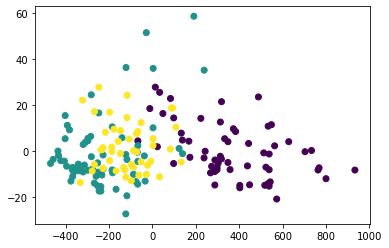

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.scatter(PCscore[:,0],PCscore[:,1],c=y)
plt.show()

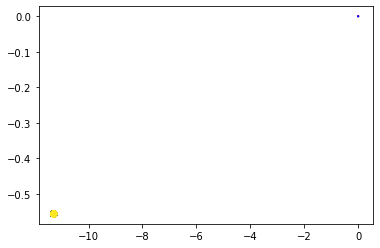

In [27]:
plt.scatter(mX_df[0],mX_df[1],c=y)
origin=[0],[0]
plt.quiver((0,0),(0,0),elgens_v[0,:],elgens_v[1,:],color=['r','b'],scale=3)
plt.show()

### 2. k-means
#### 와인데이터를 군집화 하고 적절한 k를 확인

In [61]:
x_data=wine.data[:,:2]
y_data=wine.target

In [62]:
from sklearn.cluster import KMeans

In [63]:
km=KMeans(n_clusters=3, random_state=102)
km.fit(x_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=102, tol=0.0001, verbose=0)

In [64]:
new_labels=km.labels_

In [65]:
centers=km.cluster_centers_
print(centers)

[[13.71538462  1.79969231]
 [12.21349206  1.6531746 ]
 [13.0632      3.8948    ]]


In [66]:
wine_df=pd.DataFrame(wine.data,columns=wine.feature_names)
wine_df['target']=pd.DataFrame(wine.target)
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [67]:
wine_df['new labels']=new_labels
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target,new labels
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0,0


In [72]:
wine_result=wine_df.groupby(["target","new labels"])["alcohol"].count()
wine_result

target  new labels
0       0             51
        1              1
        2              7
1       0              6
        1             55
        2             10
2       0              8
        1              7
        2             33
Name: alcohol, dtype: int64

In [73]:
from sklearn.datasets import make_blobs

In [74]:
X,y=make_blobs(n_samples=150, n_features=2, centers=3, random_state=10)

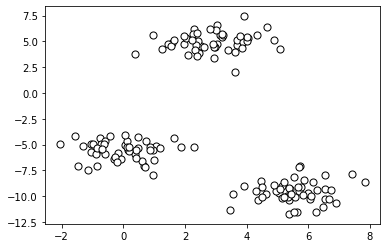

In [75]:
plt.scatter(X[:,0],X[:,1],c='white',marker='o',edgecolor='black',s=50)
plt.show()

In [76]:
km=KMeans(n_clusters=3,random_state=102)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=102, tol=0.0001, verbose=0)

In [77]:
y_km=km.labels_

In [78]:
y_km

array([2, 0, 0, 2, 2, 0, 2, 0, 1, 1, 0, 0, 2, 1, 0, 0, 0, 1, 0, 2, 1, 1,
       2, 1, 2, 1, 1, 2, 0, 0, 1, 1, 2, 0, 1, 2, 1, 0, 1, 0, 2, 2, 0, 0,
       1, 2, 0, 0, 2, 0, 0, 2, 2, 1, 1, 1, 2, 1, 0, 0, 0, 1, 0, 1, 2, 1,
       2, 1, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 0, 1, 2, 1, 2, 0, 2, 0, 2,
       0, 2, 2, 1, 1, 0, 0, 0, 2, 0, 2, 2, 1, 1, 1, 2, 0, 0, 1, 0, 1, 0,
       0, 2, 0, 0, 1, 1, 1, 0, 1, 2, 2, 2, 2, 1, 0, 0, 1, 1, 0, 1, 2, 1,
       2, 0, 1, 2, 2, 2, 0, 2, 1, 0, 2, 0, 0, 0, 2, 2, 1, 2])

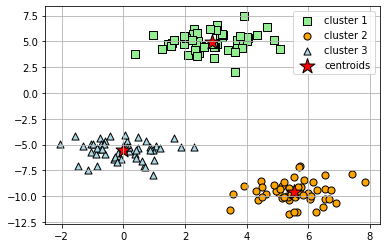

In [79]:
plt.scatter(X[y_km==0,0],X[y_km==0,1],s=50,c='lightgreen',marker='s',edgecolor='black',label='cluster 1')
plt.scatter(X[y_km==1,0],X[y_km==1,1],s=50,c='orange',marker='o',edgecolor='black',label='cluster 2')
plt.scatter(X[y_km==2,0],X[y_km==2,1],s=50,c='lightblue',marker='^',edgecolor='black',label='cluster 3')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],s=250,marker='*',c='red',edgecolor='black',label='centroids')
plt.legend()
plt.grid()
plt.show()

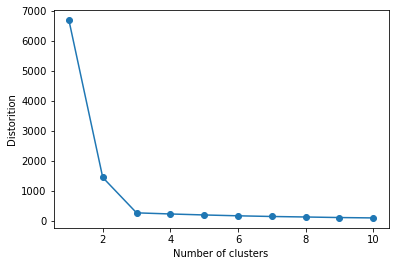

In [80]:
distoritions=[]

for i in range(1,11):
    km=KMeans(n_clusters=i, random_state=102)
    km.fit(X)
    distoritions.append(km.inertia_)

plt.plot(range(1,11),distoritions,marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distorition')
plt.show()

### 3. DBSCAN
#### 와인데이터 군집화

In [92]:
from sklearn.cluster import DBSCAN
feature=wine_df[['alcohol','malic_acid','ash','alcalinity_of_ash','magnesium','total_phenols','flavanoids','nonflavanoid_phenols','proanthocyanins','color_intensity','hue','od280/od315_of_diluted_wines','proline']]
model=DBSCAN(eps=0.7,min_samples=3)
clst=model.fit_predict(feature)

In [93]:
clst

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

In [94]:
predict=pd.DataFrame(clst)
predict.columns=['predict']

In [95]:
wine_pred=feature.join(predict)
wine_pred

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,predict
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,-1
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,-1
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,-1
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,-1
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,-1
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,-1
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,-1
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,-1


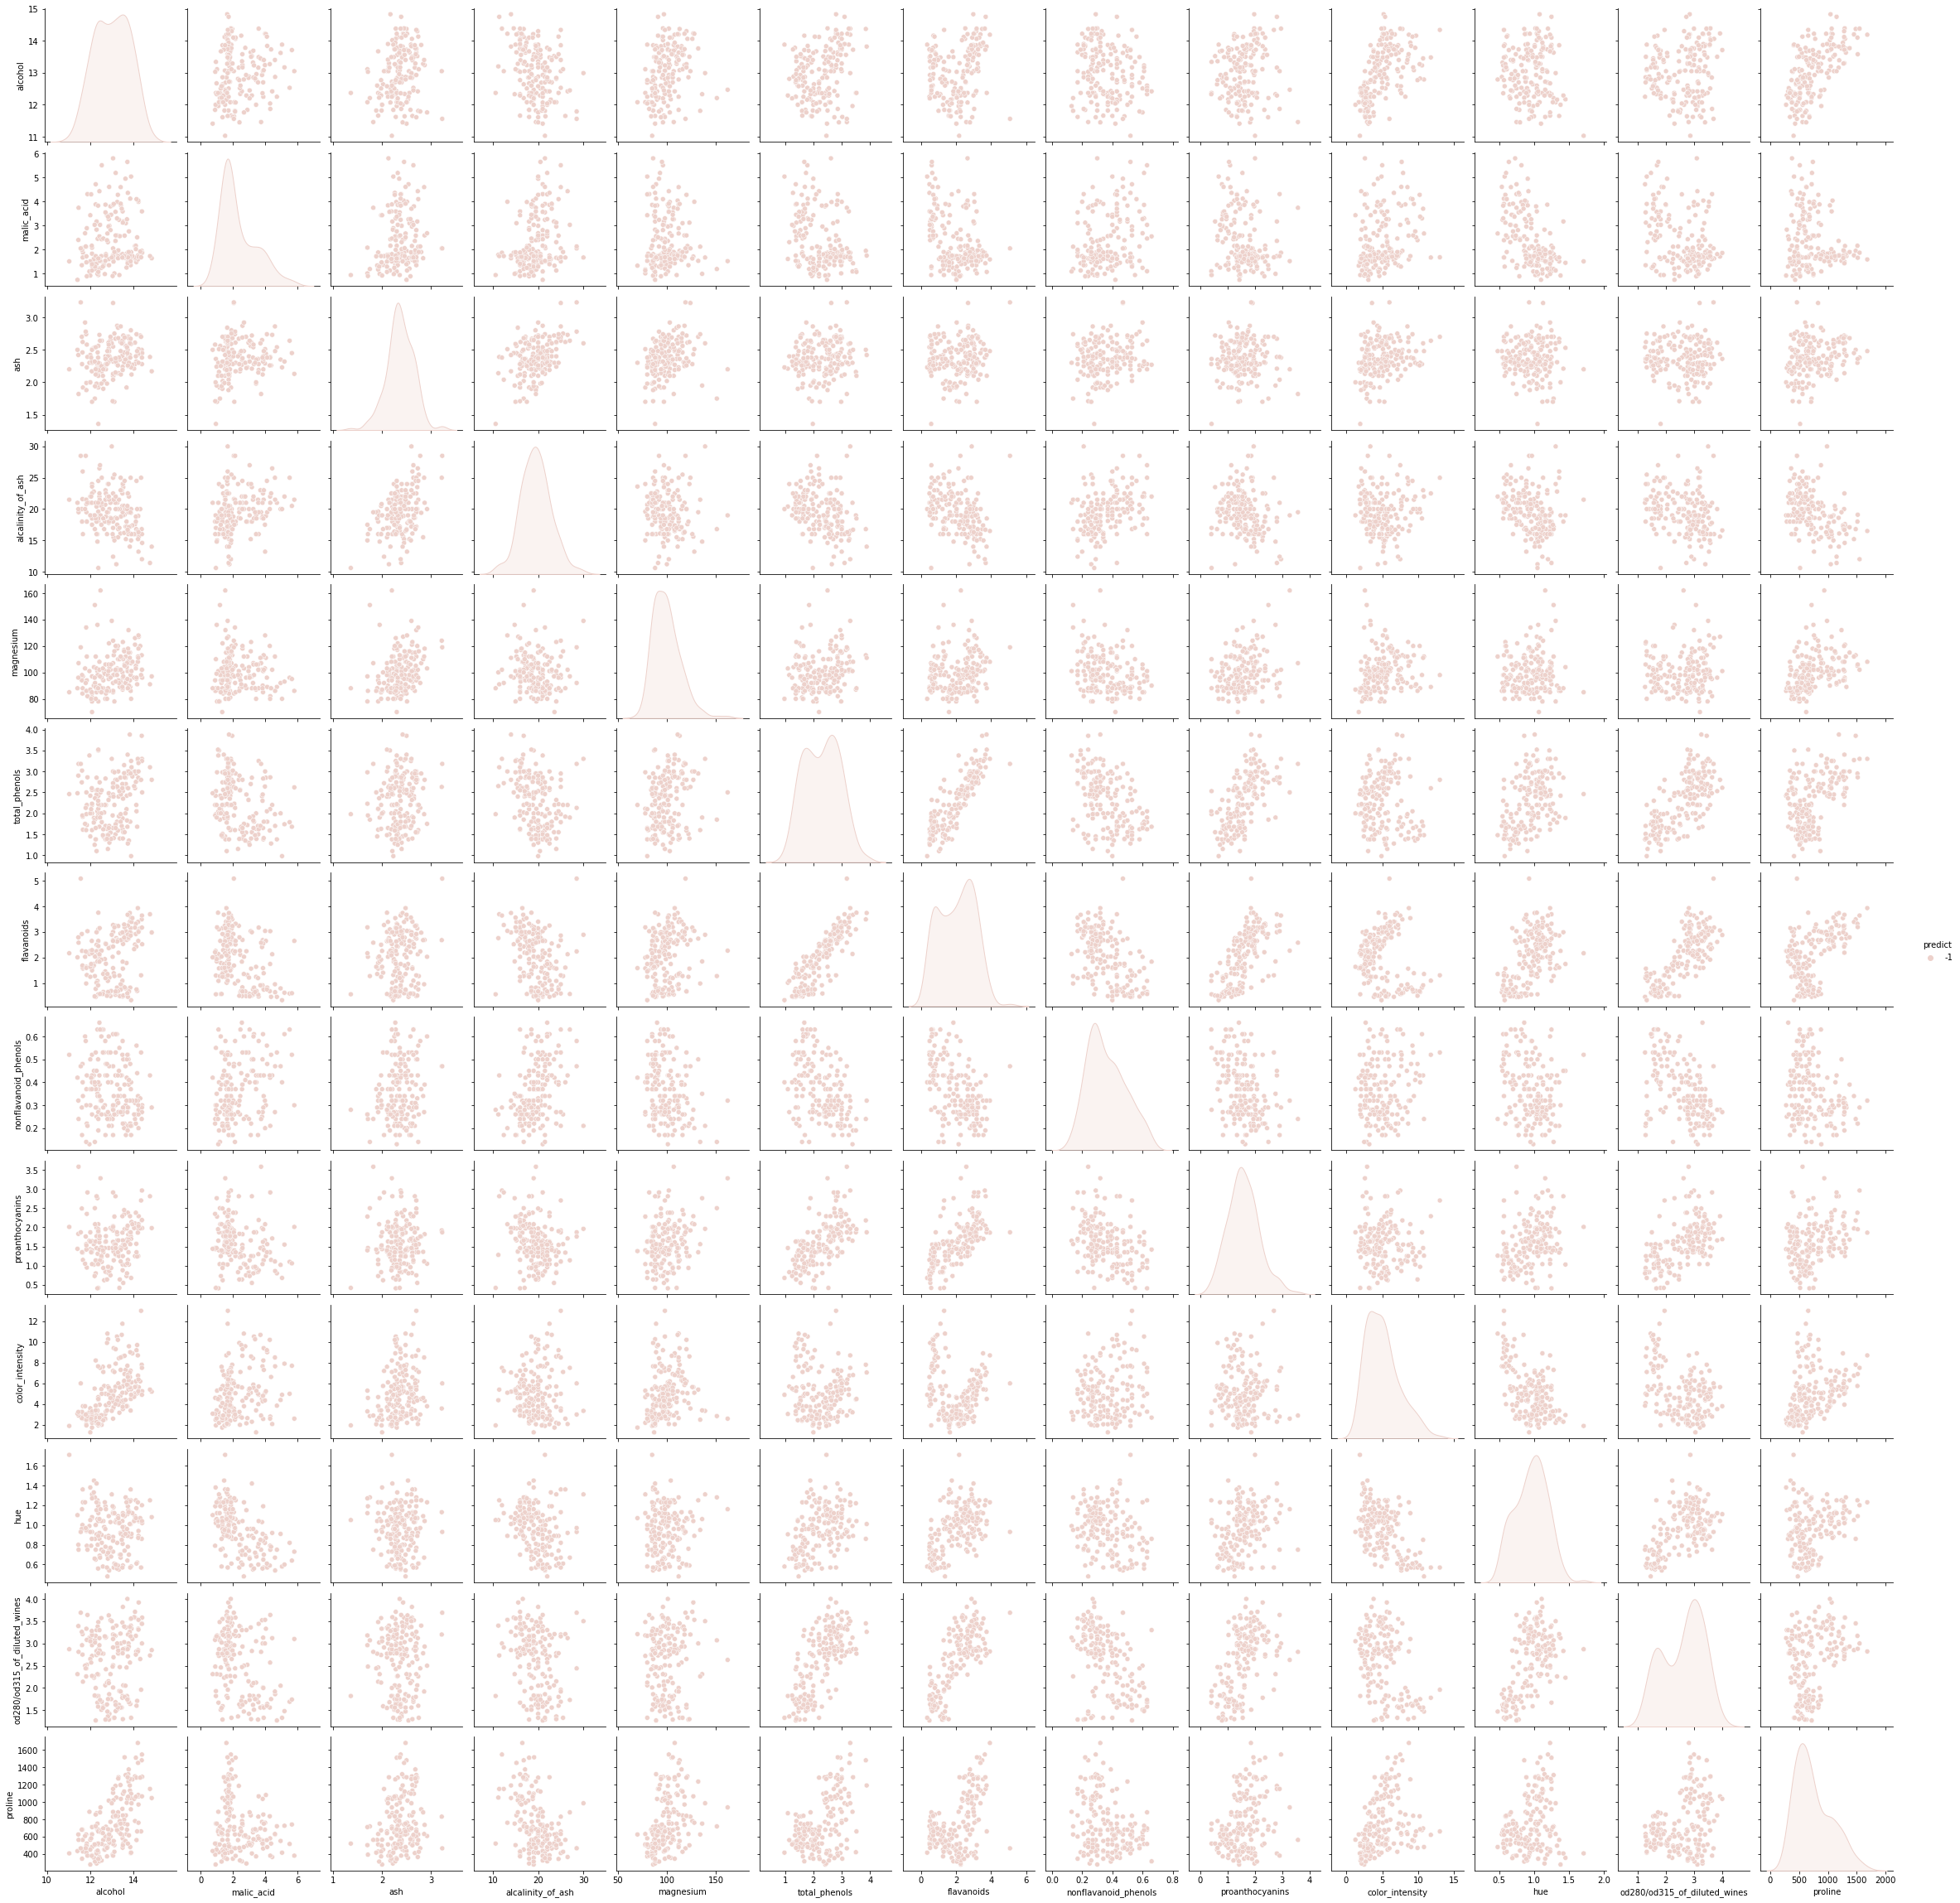

In [97]:
sns.pairplot(wine_pred,hue='predict')
plt.show()